In [2]:
import pandas as pd

# Load the dataset (Replace 'brent_oil.csv' with the actual file name)
df = pd.read_csv(r"C:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\data\raw\BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)

# Display first few rows
print(df.head())

# Ensure Date column is in proper datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")

# Sort by date in ascending order
df = df.sort_values("Date")

# Check for missing values
print(df.isnull().sum())

# Save cleaned data (optional)
df.to_csv("cleaned_brent_oil.csv", index=False)

print("✅ Data Preprocessing Completed!")


C:\Users\user\AppData\Local\Temp\ipykernel_14720\3304873248.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\user\Projects\Brent-Oil-Price-Analysis-for-Birhan-Energies\data\raw\BrentOilPrices.csv", parse_dates=["Date"], dayfirst=True)


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
Date     0
Price    0
dtype: int64
✅ Data Preprocessing Completed!


In [3]:
# Set Date as index
df.set_index("Date", inplace=True)

# Resample to ensure daily frequency (fill missing dates)
df = df.asfreq("D")

# Fill missing prices using forward-fill
#df["Price"].fillna(method="ffill", inplace=True)
df["Price"]=df["Price"].ffill()
# Reset index
df.reset_index(inplace=True)

print("✅ Missing dates handled!")


✅ Missing dates handled!


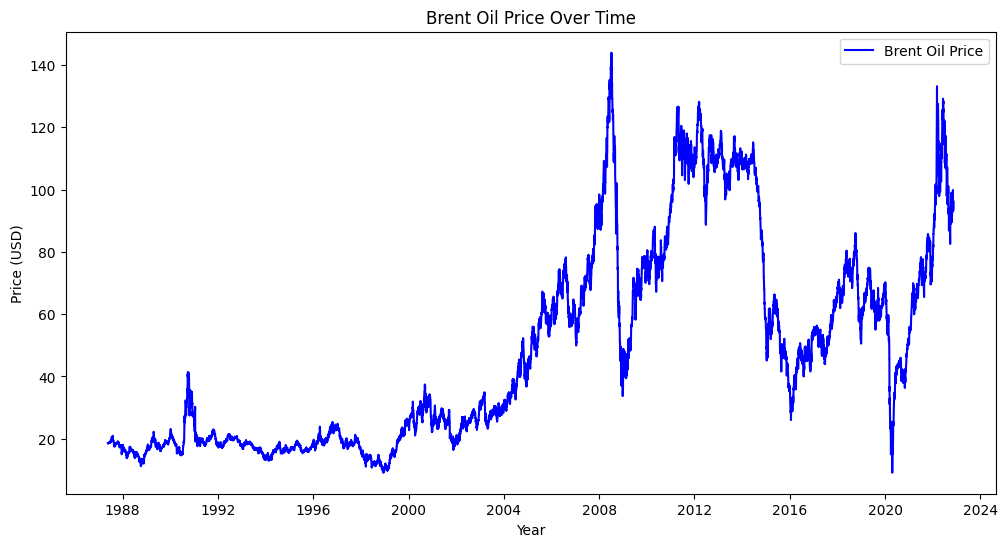

In [4]:
import matplotlib.pyplot as plt

# Plot price trend
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Brent Oil Price Over Time")
plt.legend()
plt.show()
